In [ ]:
!pip install -q google-generativeai


In [ ]:
import google.generativeai as genai

genai.configure(api_key="")


In [ ]:
from google.colab import files

# Upload the MentalChat 100 file (JSON format)
uploaded = files.upload()



Saving mentalchat 16k modified dataset.json to mentalchat 16k modified dataset.json


In [ ]:
import json
import pandas as pd

# Load and display the dataset
with open("mentalchat 16k modified dataset.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()



,question,answer
0,I hadn't thought about that. I've been so focu...,That's a great first step. It's essential to r...
1,"I've always been a diligent patient, relying o...",Your experience of relying solely on your doct...
2,I agree. My upbringing has influenced my thoug...,It's great that you're recognizing the influen...
3,I've been struggling with feelings of worthles...,It's not uncommon for individuals to experienc...
4,I've been feeling overwhelmed and disconnected...,I can sense the frustration and disappointment...


In [ ]:
import requests
from tqdm import tqdm

# Use your real API key from Google AI Studio
API_KEY = ""

def call_gemini_2_flash(prompt):
    url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={API_KEY}"



    headers = {
        "Content-Type": "application/json"
    }

    payload = {
        "contents": [
            {
                "parts": [
                    {"text": prompt}
                ]
            }
        ]
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            return response.json()["candidates"][0]["content"]["parts"][0]["text"]
        except:
            return "Error: No text returned"
    else:
        return f"Error {response.status_code}: {response.text}"


In [ ]:
print(call_gemini_2_flash(df['question'][0]))


That's a wonderful realization! It's easy to get caught up in the practicalities of physical illness, but the mental and emotional toll can be just as significant, and often directly impacts physical well-being.

Here's why focusing on the mental and emotional aspects is so important and some things you might consider when speaking with her healthcare team:

*   **The Mind-Body Connection:** Appetite, energy levels, and even the body's ability to heal are all influenced by mental and emotional states. Depression, anxiety, or even just a general feeling of hopelessness can significantly impact appetite and overall health.
*   **Quality of Life:** Even with a physical illness, focusing on mental and emotional well-being can greatly improve her quality of life. This is crucial, regardless of the prognosis.
*   **Reactivation of Old Issues:** Physical illness can sometimes resurface past trauma or emotional vulnerabilities. Addressing these underlying issues can provide a sense of control 

In [ ]:
generated_responses = []

print("Generating Gemini 2.0 Flash responses for all prompts...\n")

for prompt in tqdm(df['question']):
    cleaned_prompt = str(prompt).strip()
    reply = call_gemini_2_flash(cleaned_prompt)
    generated_responses.append(reply)

df["gemini2_response"] = generated_responses

# Preview the first few rows
df[["question", "answer", "gemini2_response"]].head()


Generating Gemini 2.0 Flash responses for all prompts...



100%|██████████| 100/100 [10:48<00:00,  6.49s/it]


,question,answer,gemini2_response
0,I hadn't thought about that. I've been so focu...,That's a great first step. It's essential to r...,That's a really insightful realization and a p...
1,"I've always been a diligent patient, relying o...",Your experience of relying solely on your doct...,"That's a really common experience, and it's co..."
2,I agree. My upbringing has influenced my thoug...,It's great that you're recognizing the influen...,This is a healthy and insightful perspective. ...
3,I've been struggling with feelings of worthles...,It's not uncommon for individuals to experienc...,It sounds like you're going through a really t...
4,I've been feeling overwhelmed and disconnected...,I can sense the frustration and disappointment...,It sounds incredibly frustrating to feel this ...


In [ ]:
def call_gemini_2_flash(prompt):
    ...


In [ ]:
def call_gemini_2_flash(prompt):
    import requests

    API_KEY = ""  # use your actual API key
    url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={API_KEY}"

    headers = {
        "Content-Type": "application/json"
    }

    payload = {
        "contents": [
            {
                "parts": [
                    {"text": prompt}
                ]
            }
        ]
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            return response.json()["candidates"][0]["content"]["parts"][0]["text"]
        except Exception as e:
            return f"Error parsing response: {str(e)}"
    else:
        return f"Error {response.status_code}: {response.text}"


In [ ]:
from tqdm import tqdm

generated_responses = []

print("Generating Gemini 2.0 Flash responses with prompt engineering...")

for prompt in tqdm(df["question"]):
    engineered_prompt = f"""
You are a supportive and professional mental health assistant.
Answer the user's concern in an empathetic, helpful, and calming way.

User: {str(prompt).strip()}
Assistant:"""

    reply = call_gemini_2_flash(engineered_prompt)
    generated_responses.append(reply)

df["gemini2_response_engineered"] = generated_responses
df[["question", "answer", "gemini2_response_engineered"]].head()


Generating Gemini 2.0 Flash responses with prompt engineering...


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


,question,answer,gemini2_response_engineered
0,I hadn't thought about that. I've been so focu...,That's a great first step. It's essential to r...,That's a wonderful realization! It's completel...
1,"I've always been a diligent patient, relying o...",Your experience of relying solely on your doct...,It's completely understandable that you're fee...
2,I agree. My upbringing has influenced my thoug...,It's great that you're recognizing the influen...,It sounds like you're giving yourself permissi...
3,I've been struggling with feelings of worthles...,It's not uncommon for individuals to experienc...,It sounds like you're going through a really t...
4,I've been feeling overwhelmed and disconnected...,I can sense the frustration and disappointment...,It sounds like you're going through a really c...


In [ ]:
def call_gemini_2_flash(prompt, temperature=0.7, top_p=1.0, top_k=40, max_output_tokens=300):
    import requests

    API_KEY = ""
    url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={API_KEY}"

    headers = {
        "Content-Type": "application/json"
    }

    payload = {
        "contents": [
            {
                "parts": [
                    {"text": prompt}
                ]
            }
        ],
        "generationConfig": {
            "temperature": temperature,
            "topK": top_k,
            "topP": top_p,
            "maxOutputTokens": max_output_tokens
        }
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            return response.json()["candidates"][0]["content"]["parts"][0]["text"]
        except Exception as e:
            return f"Error parsing response: {str(e)}"
    else:
        return f"Error {response.status_code}: {response.text}"


In [ ]:
reply = call_gemini_2_flash(engineered_prompt, temperature=0.9, top_p=0.8, top_k=30, max_output_tokens=250)


In [ ]:
# Define the prompt engineering function
def engineer_prompt(user_input):
    return f"""You are a supportive and professional mental health assistant.
Answer the user's concern in an empathetic, helpful, and calming way.

User: {user_input.strip()}
Assistant:"""


In [ ]:
# Example set 1 (higher creativity)
df['gemini_temp09_response'] = df['question'].apply(
    lambda q: call_gemini_2_flash(prompt=engineer_prompt(q), temperature=0.9, top_p=0.8, top_k=30, max_output_tokens=250)
)

# Example set 2 (more focused & shorter)
df['gemini_temp05_response'] = df['question'].apply(
    lambda q: call_gemini_2_flash(prompt=engineer_prompt(q), temperature=0.5, top_p=1.0, top_k=40, max_output_tokens=150)
)


In [ ]:
index = 42  # change this to test different inputs
print("🧠 Question:\n", df.loc[index, "question"])
print("\n✅ Human Answer:\n", df.loc[index, "answer"])
print("\n🤖 Gemini (Creative):\n", df.loc[index, "gemini_temp09_response"])
print("\n🤖 Gemini (Concise):\n", df.loc[index, "gemini_temp05_response"])


🧠 Question:
 I've been trying to help my hospitalized mother manage her constipation, but it's a challenge. I
find myself constantly checking on her, making sure she's eating enough fiber and monitoring her
bowel movements. It's difficult to give her medication directly, as she's not eating much, and I'm
worried about her overall health.

The weight of responsibility for my mother's well-being feels like a heavy burden on my shoulders. I
can't help but worry that I'm not doing enough, that I'm failing her in some way. This constant
anxiety is taking a toll on me, leaving me feeling drained and overwhelmed. I can't remember
the last time I had a good night's sleep or took care of myself.

My mother's illness has brought up a lot of unresolved emotions from my past. I've always felt
like I've had to take care of those around me, even at the expense of my own needs. This pattern
of self-sacrifice has left me feeling powerless and helpless, both in my personal and professional
life.

✅ Hum

In [ ]:
!pip install -q evaluate rouge-score bert-score


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00


In [ ]:
import evaluate
from bert_score import score as bert_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction


In [ ]:
!pip install -q nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# ROUGE
rouge = evaluate.load("rouge")
rouge_scores = rouge.compute(predictions=df["gemini_temp09_response"], references=df["answer"])

# BLEU
smoothie = SmoothingFunction().method4
bleu_scores = [
    sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie)
    for ref, pred in zip(df["answer"], df["gemini_temp09_response"])
]
avg_bleu = sum(bleu_scores) / len(bleu_scores)

# BERTScore
P, R, F1 = bert_score(df["gemini_temp09_response"].tolist(), df["answer"].tolist(), lang="en")
bert_score_avg = {
    "precision": P.mean().item(),
    "recall": R.mean().item(),
    "f1": F1.mean().item()
}

# Display results
print("📊 ROUGE Scores:")
for k, v in rouge_scores.items():
    print(f"{k}: {v:.4f}")

print("\n📊 BLEU Score:")
print(f"BLEU: {avg_bleu:.4f}")

print("\n📊 BERTScore:")
for k, v in bert_score_avg.items():
    print(f"{k}: {v:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📊 ROUGE Scores:
rouge1: 0.1153
rouge2: 0.0166
rougeL: 0.0701
rougeLsum: 0.0922

📊 BLEU Score:
BLEU: 0.0076

📊 BERTScore:
precision: 0.6995
recall: 0.8130
f1: 0.7512


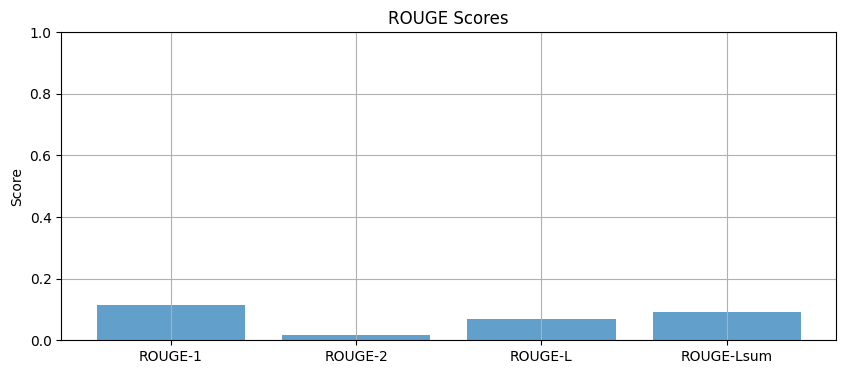

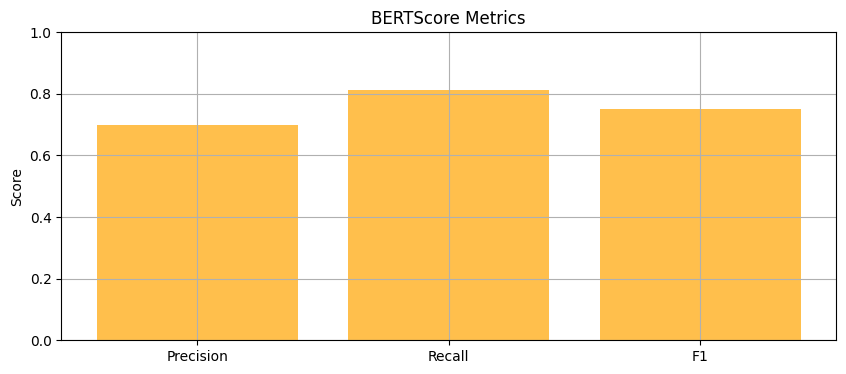

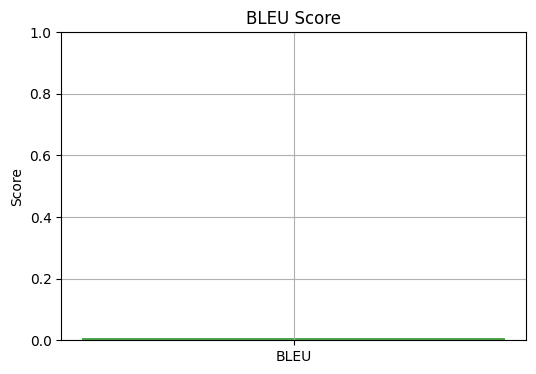

In [ ]:
import matplotlib.pyplot as plt

# ROUGE scores
rouge_scores = {
    "ROUGE-1": 0.1153,
    "ROUGE-2": 0.0166,
    "ROUGE-L": 0.0701,
    "ROUGE-Lsum": 0.0922
}

# BERTScore metrics
bert_scores = {
    "Precision": 0.6995,
    "Recall": 0.8130,
    "F1": 0.7512
}

# BLEU score
bleu_score = 0.0076

# Plotting ROUGE scores
plt.figure(figsize=(10, 4))
plt.bar(rouge_scores.keys(), rouge_scores.values(), alpha=0.7)
plt.title("ROUGE Scores")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plotting BERTScore metrics
plt.figure(figsize=(10, 4))
plt.bar(bert_scores.keys(), bert_scores.values(), alpha=0.7, color='orange')
plt.title("BERTScore Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plotting BLEU score
plt.figure(figsize=(6, 4))
plt.bar(["BLEU"], [bleu_score], color='green', alpha=0.7)
plt.title("BLEU Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()
